#Question 1

#Part 1

In [314]:
import warnings
warnings.filterwarnings("ignore")

In [315]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/Lab_Data/titanic.csv')
df

,PassengerId,Name,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...
886,887,"Montvila, Rev. Juozas",2,male,27.0,211536,13.0000,NaN,S,0
887,888,"Graham, Miss. Margaret Edith",1,female,19.0,112053,30.0000,B42,S,1
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",3,female,NaN,W./C. 6607,23.4500,NaN,S,0
889,890,"Behr, Mr. Karl Howell",1,male,26.0,111369,30.0000,C148,C,1


Total samples are 891

Analyzing the data

In [316]:
#columns/features/labels in dataset
df.columns.values

array(['PassengerId', 'Name', 'Pclass', 'Sex', 'Age', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'Survived'], dtype=object)

In [317]:
#preview of the data set
df.head()

,PassengerId,Name,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,373450,8.0500,NaN,S,0


data type: <br>
Continous: Age, Fare <br>
Categorical: Survived, Sex, and Embarked. Ordinal: Pclass.<br>
AlphaNumeric: Cabin

In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Name         891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   Ticket       891 non-null    object 
 6   Fare         891 non-null    float64
 7   Cabin        204 non-null    object 
 8   Embarked     889 non-null    object 
 9   Survived     891 non-null    int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 69.7+ KB


Names are unique across the dataset (count=unique=891)<br>


In [319]:
df.describe()

,PassengerId,Pclass,Age,Fare,Survived
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,32.204208,0.383838
std,257.353842,0.836071,14.526497,49.693429,0.486592
min,1.000000,1.000000,0.420000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,7.910400,0.000000
50%,446.000000,3.000000,28.000000,14.454200,0.000000
75%,668.500000,3.000000,38.000000,31.000000,1.000000
max,891.000000,3.000000,80.000000,512.329200,1.000000


Survived is a categorical feature with 0 or 1 values.<br>
Around 38%(mean os survived = 0.383838) samples survived. <br>
Fares varied significantly(std of fare = 49.69) with few passengers paying as high as $512(max fare).<br>
Few elderly passengers within age range 65-80(std of age = 14.52).

In [320]:
#distribution of categorical data
df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


Sex variable as two possible values with 65% male (top=male, freq=577/count=891).<br>Embarked takes three possible values. S port used by most passengers (top=S) <br>
Ticket feature has high ratio (22%) of duplicate values (unique=681).<br>
Cabin values have several dupicates across samples.


Analyzing by pivoting features

In [321]:
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In Pclass, We observe significant correlation (>0.5) among Pclass=1 and Survived. We decide to include this feature in our model.

In [322]:
df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Sex We confirm the observation during problem definition that Sex=female had very high survival rate at 74%.

Data Visualization

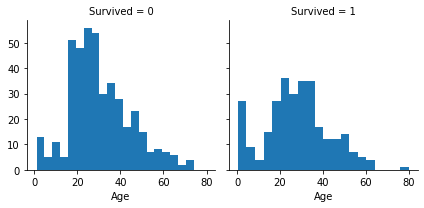

In [323]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.FacetGrid(df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

Obsevations from data:<br>
Age <=4 had high survival rate.<br>
Oldest passengers (Age = 80) survived.<br>
Large number of 15-25 year olds did not survive.<br>
Most passengers are in 15-35 age range.
<br>
Decisions:<br>
We should consider Age in our model training.

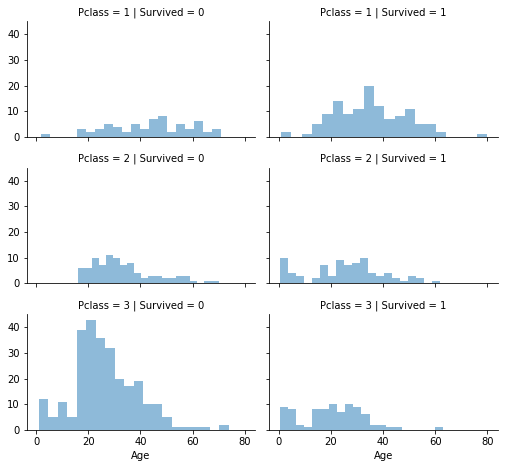

In [324]:
grid = sns.FacetGrid(df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

Observations from dataset:<br>
Pclass=3 had most passengers, however most did not survive. <br>
Infant passengers in Pclass=2 and Pclass=3 mostly survived. <br>
Most passengers in Pclass=1 survived.<br>
Pclass varies in terms of Age distribution of passengers.<br>
Decision: <br>
Consider Pclass for model training.

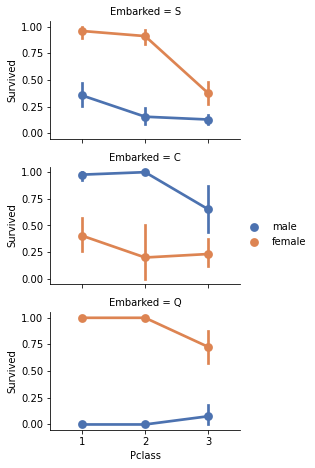

In [325]:
grid = sns.FacetGrid(df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

Observations:<br>
Female passengers had much better survival rate than males.<br>
Males had better survival rate in Pclass=3 when compared with Pclass=2 for C and Q ports. <br>

Decisions:<br>
Add Sex feature and Embarked feature to model training.

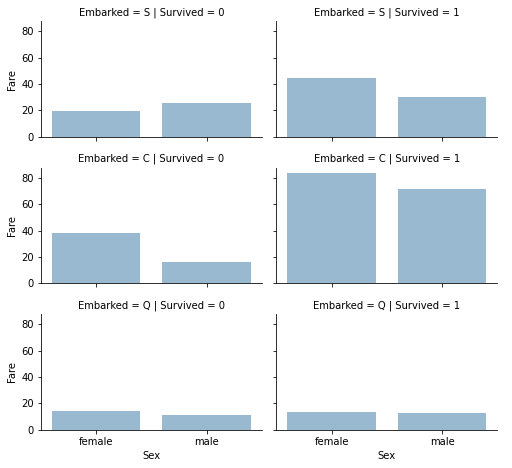

In [326]:
grid = sns.FacetGrid(df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

Observations:<br>
Higher fare paying passengers had better survival.<br>
Port of embarkation correlates with survival rates.<br>
Decision:<br>
Consider banding Fare feature.

Pre-Processing

In [327]:
#removing unnecessary features like PassengerID, Name, Ticket, Cabin
df = df.drop({'PassengerId','Name','Ticket','Cabin'},axis=1)
df

,Pclass,Sex,Age,Fare,Embarked,Survived
0,3,male,22.0,7.2500,S,0
1,1,female,38.0,71.2833,C,1
2,3,female,26.0,7.9250,S,1
3,1,female,35.0,53.1000,S,1
4,3,male,35.0,8.0500,S,0
...,...,...,...,...,...,...
886,2,male,27.0,13.0000,S,0
887,1,female,19.0,30.0000,S,1
888,3,female,NaN,23.4500,S,0
889,1,male,26.0,30.0000,C,1


In [328]:
#checking for null values
df.isnull().sum()

Pclass        0
Sex           0
Age         177
Fare          0
Embarked      2
Survived      0
dtype: int64

In [329]:
#replacing null values in 'Embarked' column with mode
max_freq = df.Embarked.dropna().mode()[0]
df['Embarked'] = df['Embarked'].replace(to_replace = np.nan, value=max_freq)

In [330]:
#replacing null values in 'Age' column with average age
avg_age=df.Age.dropna().mean()
df['Age'] = df['Age'].replace(to_replace = np.nan, value=avg_age)

In [331]:
#after replacing all null values
df.isnull().sum()

Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
Survived    0
dtype: int64

In [332]:
#encoding categorical data such as 'Sex','Embarked'
df['Embarked'] = df['Embarked'].replace(to_replace='S',value=0)
df['Embarked'] = df['Embarked'].replace(to_replace='C',value=1)
df['Embarked'] = df['Embarked'].replace(to_replace='Q',value=2)
df['Sex'] = df['Sex'].replace(to_replace='male',value=0)
df['Sex'] = df['Sex'].replace(to_replace='female',value=1)
df

,Pclass,Sex,Age,Fare,Embarked,Survived
0,3,0,22.000000,7.2500,0,0
1,1,1,38.000000,71.2833,1,1
2,3,1,26.000000,7.9250,0,1
3,1,1,35.000000,53.1000,0,1
4,3,0,35.000000,8.0500,0,0
...,...,...,...,...,...,...
886,2,0,27.000000,13.0000,0,0
887,1,1,19.000000,30.0000,0,1
888,3,1,29.699118,23.4500,0,0
889,1,0,26.000000,30.0000,1,1


In [333]:
#separating features and labels
X = df.drop('Survived',axis=1)
y = df['Survived']
print('Features:')
print(X)
print('-'*100)
print('Labels:')
print(y)

Features:
     Pclass  Sex        Age     Fare  Embarked
0         3    0  22.000000   7.2500         0
1         1    1  38.000000  71.2833         1
2         3    1  26.000000   7.9250         0
3         1    1  35.000000  53.1000         0
4         3    0  35.000000   8.0500         0
..      ...  ...        ...      ...       ...
886       2    0  27.000000  13.0000         0
887       1    1  19.000000  30.0000         0
888       3    1  29.699118  23.4500         0
889       1    0  26.000000  30.0000         1
890       3    0  32.000000   7.7500         2

[891 rows x 5 columns]
----------------------------------------------------------------------------------------------------
Labels:
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


Splitting the data into train and test sets. 

In [334]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Train:Test = ",len(X_train),":",len(X_test))

Train:Test =  623 : 268


#Part 2

Gaussian Naive Bayes

In [335]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train);
y_pred = model.predict(X_test);
model.score(X_test,y_test)

0.7910447761194029

Multinomial Naive Bayes

In [336]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = MultinomialNB()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.7052238805970149

#Part 3

#Gaussian Naive Bayes

In [337]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train);

#Metrics to Measure Classification Performance

Accuracy

In [338]:
print("Accuracy Score of model on testing dataset is:", model.score(X_test,y_test)*100,"%")

Accuracy Score of model on testing dataset is: 79.1044776119403 %


Confusion Matrix

Confusion Matrix:
[[132  25]
 [ 31  80]]


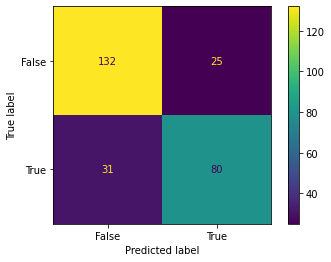

In [339]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

y_pred = model.predict(X_test);
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:")
print(cf_matrix)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cf_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

AUC/ROC

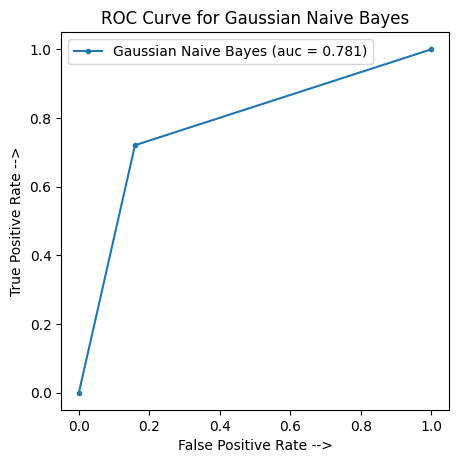

In [340]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, threshold = roc_curve(y_test, y_pred)
aucc = auc(fpr,tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(fpr, tpr, marker='.', label='Gaussian Naive Bayes (auc = %0.3f)' % aucc)
plt.title("ROC Curve for Gaussian Naive Bayes")
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

Precision

In [341]:
from sklearn.metrics import precision_score
print("Precision:", precision_score(y_test, y_pred)*100,"%")

Precision: 76.19047619047619 %


Recall

In [342]:
from sklearn.metrics import recall_score
print("Recall:", recall_score(y_test,y_pred)*100,"%")

Recall: 72.07207207207207 %


F1 Score

In [343]:
from sklearn.metrics import f1_score
print("F1 Score:", f1_score(y_test,y_pred)*100,"%")

F1 Score: 74.07407407407408 %


Kappa

In [344]:
from sklearn.metrics import cohen_kappa_score
print("Kappa:", cohen_kappa_score(y_test,y_pred))

Kappa: 0.5659667996992307


MCC (Matthews Correlation Coefficient)

In [345]:
from sklearn.metrics import matthews_corrcoef
print("MCC (Matthews Correlation Coefficient):", matthews_corrcoef(y_test,y_pred))

MCC (Matthews Correlation Coefficient): 0.5665797685503138


#Part 4

5 fold cross validation

In [346]:
from sklearn.model_selection import cross_validate
def fivefold(model,X,y):
  res = cross_validate(model,X,y,scoring="accuracy",return_train_score = True)
  print("Train Accuracy Scores:")
  i = 1
  for x in res['train_score']:
    print("Fold",i,":", x*100, "%")
    i+=1
  print("")
  print("Average Train Accuracy score:", np.mean(res['train_score'])*100,"%")
  i=1
  print(" ")
  print("Test Accuracy Scores:")
  for y in res['test_score']:
    print("Fold",i,":",y*100,"%")
    i+=1
  print("")
  print("Average Test Accuracy score:", np.mean(res['test_score'])*100,"%")
  return res['train_score'],res['test_score']

train_acc, test_acc = fivefold(model,X,y)

Train Accuracy Scores:
Fold 1 : 79.7752808988764 %
Fold 2 : 76.99859747545582 %
Fold 3 : 78.40112201963534 %
Fold 4 : 78.68162692847125 %
Fold 5 : 78.26086956521739 %

Average Train Accuracy score: 78.42349937753124 %
 
Test Accuracy Scores:
Fold 1 : 73.74301675977654 %
Fold 2 : 79.7752808988764 %
Fold 3 : 80.33707865168539 %
Fold 4 : 76.40449438202246 %
Fold 5 : 79.21348314606742 %

Average Test Accuracy score: 77.89467076768565 %


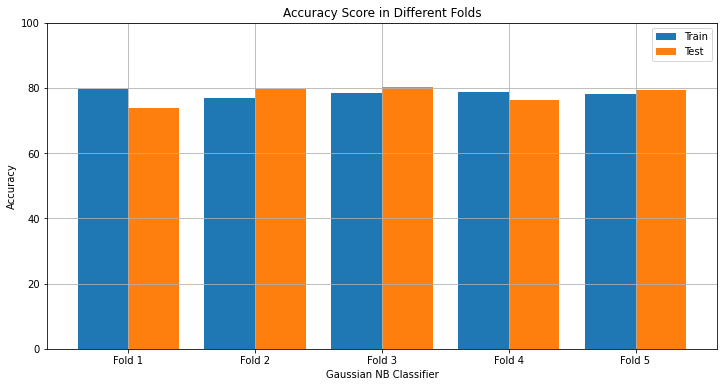

In [347]:
#visualization using bar plot
def visualize(X_axi, Y_axis1, Y_axis2):
  plt.figure(figsize=(12,6))
  X_axis = np.arange(len(X_axi))
  
  plt.bar(X_axis - 0.2, Y_axis1, 0.4, label = 'Train')
  plt.bar(X_axis + 0.2, Y_axis2, 0.4, label = 'Test')
  plt.xticks(X_axis, X_axi)
  plt.ylim(0, 100)
  plt.xlabel("Gaussian NB Classifier")
  plt.ylabel("Accuracy")
  plt.title("Accuracy Score in Different Folds")
  plt.legend()
  plt.grid(True)
  plt.show()

X_axi = ['Fold 1','Fold 2','Fold 3','Fold 4', 'Fold 5']
Y_axis1 = train_acc*100
Y_axis2 = test_acc*100
visualize(X_axi,Y_axis1,Y_axis2)

Computing the
probability of the top class for each row in the testing dataset

In [348]:
temp_df = X_test.copy()
pred = model.predict(X_test)
pred_prob = model.predict_proba(X_test)
pps = []
ppns = []
prob_top_class = []
for x in pred_prob:
  pps.append(x[1])
  ppns.append(x[0])
  prob_top_class.append(x.max())

temp_df['Probability_Top_Class'] = prob_top_class
temp_df

,Pclass,Sex,Age,Fare,Embarked,Probability_Top_Class
709,3,0,29.699118,15.2458,1,0.961429
439,2,0,31.000000,10.5000,0,0.946974
840,3,0,20.000000,7.9250,0,0.968253
720,2,1,6.000000,33.0000,0,0.821879
39,3,1,14.000000,11.2417,1,0.677292
...,...,...,...,...,...,...
821,3,0,27.000000,8.6625,0,0.972655
633,1,0,29.699118,0.0000,0,0.820323
456,1,0,65.000000,26.5500,0,0.708019
500,3,0,17.000000,8.6625,0,0.965566


#Part 5

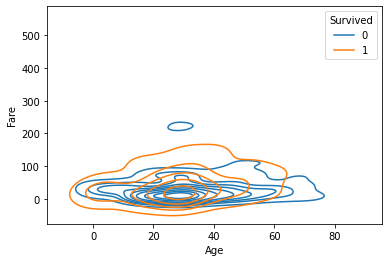

In [349]:
sns.kdeplot(x='Age',y='Fare',hue='Survived',data=df)

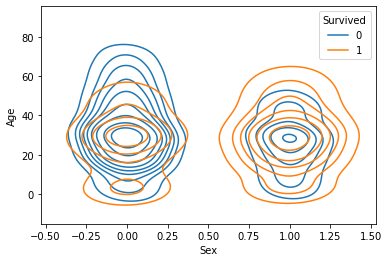

In [350]:
sns.kdeplot(x='Sex',y='Age',hue='Survived',data=df)

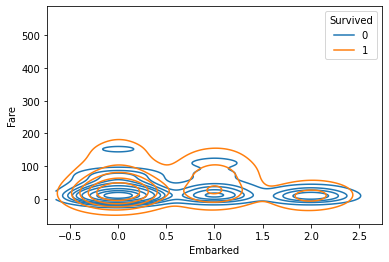

In [351]:
sns.kdeplot(x='Embarked',y='Fare',hue='Survived',data=df)

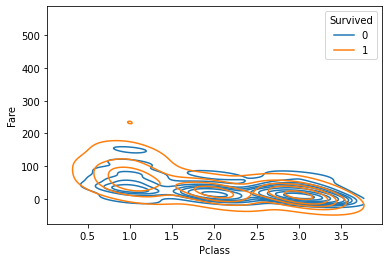

In [352]:
sns.kdeplot(x='Pclass',y='Fare',hue='Survived',data=df)

#Part 6

Decision Tree Classifier

In [353]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

Gaussian Naive Bayes

In [354]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [355]:
print("Accuracy Score for Decision Tree Classifier:", dtc.score(X_test,y_test)*100,"%")
print("Accuracy Score for Gaussian Naive Bayes:",gnb.score(X_test,y_test)*100,"%")

Accuracy Score for Decision Tree Classifier: 76.86567164179104 %
Accuracy Score for Gaussian Naive Bayes: 79.1044776119403 %


5 Fold Cross Validation: Decision Tree Classifier vs Gaussian Naive Bayes

In [356]:
print("Decision Tree Classifier:")
print("")
train_acc_dtc, test_acc_dtc = fivefold(dtc,X,y)
print("")
print("-"*100)
print("Gaussian Naive Bayes:")
print("")
train_acc_gnb, test_acc_gnb = fivefold(gnb,X,y)

Decision Tree Classifier:

Train Accuracy Scores:
Fold 1 : 98.17415730337079 %
Fold 2 : 98.45722300140253 %
Fold 3 : 98.17671809256662 %
Fold 4 : 98.45722300140253 %
Fold 5 : 98.03646563814866 %

Average Train Accuracy score: 98.26035740737822 %
 
Test Accuracy Scores:
Fold 1 : 72.06703910614524 %
Fold 2 : 79.21348314606742 %
Fold 3 : 80.89887640449437 %
Fold 4 : 76.40449438202246 %
Fold 5 : 81.46067415730337 %

Average Test Accuracy score: 78.00891343920657 %

----------------------------------------------------------------------------------------------------
Gaussian Naive Bayes:

Train Accuracy Scores:
Fold 1 : 79.7752808988764 %
Fold 2 : 76.99859747545582 %
Fold 3 : 78.40112201963534 %
Fold 4 : 78.68162692847125 %
Fold 5 : 78.26086956521739 %

Average Train Accuracy score: 78.42349937753124 %
 
Test Accuracy Scores:
Fold 1 : 73.74301675977654 %
Fold 2 : 79.7752808988764 %
Fold 3 : 80.33707865168539 %
Fold 4 : 76.40449438202246 %
Fold 5 : 79.21348314606742 %

Average Test Accuracy s

Visualization

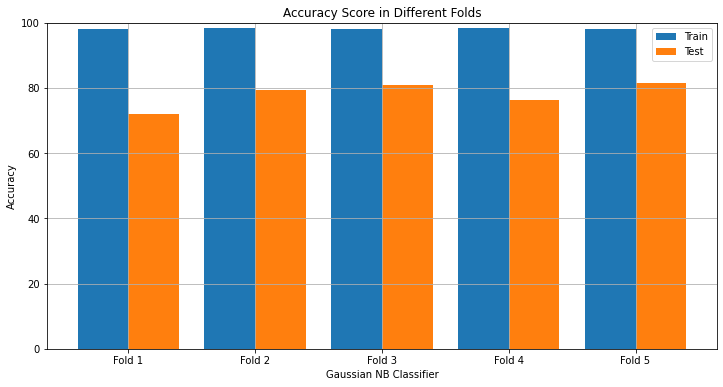

In [357]:
#Visualization for Decision Tree Classifier
X_axi = ['Fold 1','Fold 2','Fold 3','Fold 4', 'Fold 5']
Y_axis1 = train_acc_dtc*100
Y_axis2 = test_acc_dtc*100
visualize(X_axi,Y_axis1,Y_axis2)

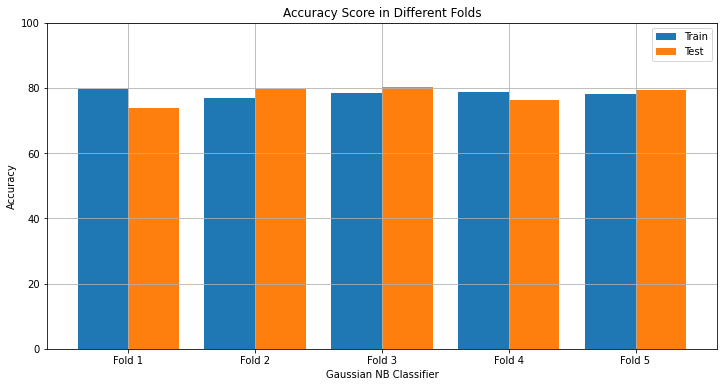

In [358]:
#Visualization For Gaussian Naive Bayes
X_axi = ['Fold 1','Fold 2','Fold 3','Fold 4', 'Fold 5']
Y_axis1 = train_acc_gnb*100
Y_axis2 = test_acc_gnb*100
visualize(X_axi,Y_axis1,Y_axis2)

<h1> Question 2</h1>

In [359]:
df = pd.read_csv('/content/drive/MyDrive/Lab_Data/dataset (1).csv')
df

,X0,X1,X2,X3,X4,X5,X6,Y
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [360]:
df.rename(columns={"X0":"Area","X1":"Perimeter","X2":"Compactness","X3":"Length of kernel","X4":"kernelwidth","X5":"Asymmetry coefficient","X6":"Length of kernel groove","Y":"Class"},inplace = True)
df

,Area,Perimeter,Compactness,Length of kernel,kernelwidth,Asymmetry coefficient,Length of kernel groove,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


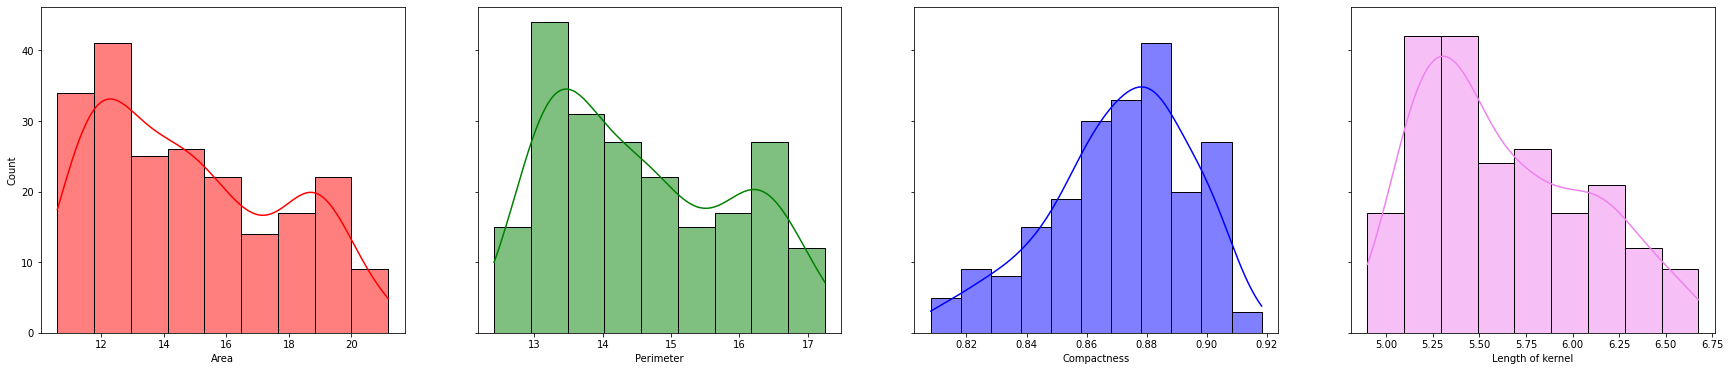

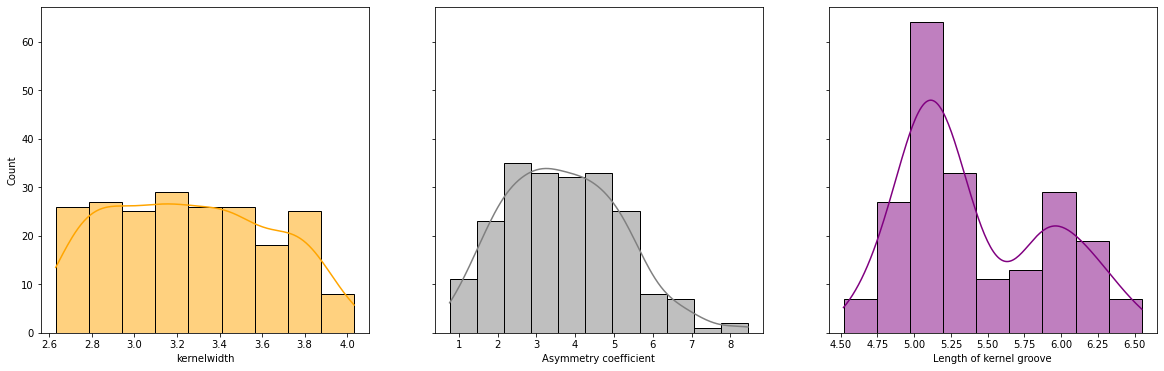

In [361]:
#Distribution of Features
fig,axes = plt.subplots(1,4,figsize = (30,6),sharey = True)
sns.histplot(df,ax=axes[0], x="Area",kde=True,color='r')
sns.histplot(df,ax=axes[1], x="Perimeter",kde=True,color='g')
sns.histplot(df,ax=axes[2], x="Compactness",kde=True,color='b')
sns.histplot(df,ax=axes[3], x="Length of kernel",kde=True,color='violet')

fig,axes = plt.subplots(1,3,figsize = (20,6),sharey = True)
sns.histplot(df,ax=axes[0], x="kernelwidth",kde=True,color='orange')
sns.histplot(df,ax=axes[1], x="Asymmetry coefficient",kde=True,color='grey')
sns.histplot(df,ax=axes[2], x="Length of kernel groove",kde=True,color='purple')

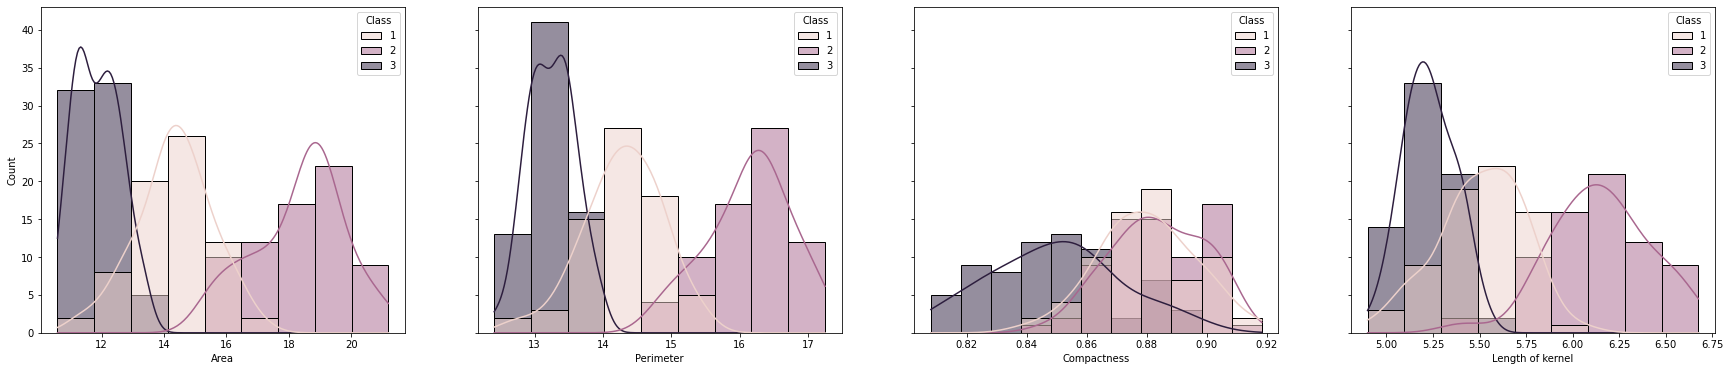

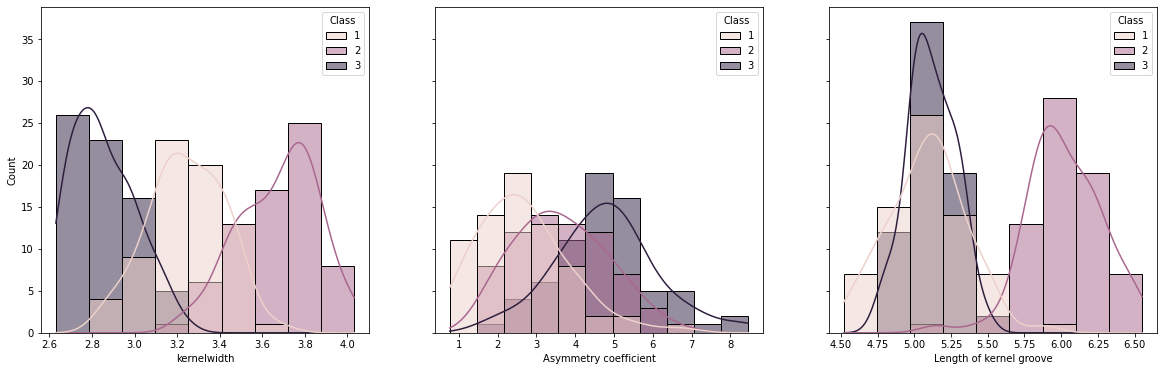

In [362]:
#Distribution of Class
fig,axes = plt.subplots(1,4,figsize = (30,6),sharey = True)
sns.histplot(df,ax=axes[0],x="Area",kde =True ,hue='Class')
sns.histplot(df,ax=axes[1],x="Perimeter",hue='Class',kde =True)
sns.histplot(df,ax=axes[2],x="Compactness",hue='Class',kde =True)
sns.histplot(df,ax=axes[3],x="Length of kernel",hue='Class',kde =True)

fig,axes = plt.subplots(1,3,figsize = (20,6),sharey = True)
sns.histplot(df,ax=axes[0],x="kernelwidth",hue='Class',kde =True)
sns.histplot(df,ax=axes[1],x="Asymmetry coefficient",hue='Class',kde =True)
sns.histplot(df,ax=axes[2],x="Length of kernel groove",hue='Class',kde =True)

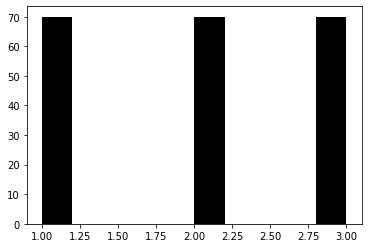

In [363]:
df["Class"].hist(grid=False,color='black')

#Part 2

Prior Probability Calculation

In [364]:
class1 = 0;
class2 = 0;
class3 = 0;
for x in df['Class']:
  if x==1:
    class1+=1;
  elif x==2:
    class2+=1
  else:
    class3+=1

prob_class1 = (class1)/(class1+class2+class3)
prob_class2 = (class2)/(class1+class2+class3)
prob_class3 = (class3)/(class1+class2+class3)

print("Prior Probability of Class 1 is:",prob_class1)
print("Prior Probability of Class 2 is:",prob_class2)
print("Prior Probability of Class 3 is:",prob_class3)

Prior Probability of Class 1 is: 0.3333333333333333
Prior Probability of Class 2 is: 0.3333333333333333
Prior Probability of Class 3 is: 0.3333333333333333


#Part 3

In [365]:
#diving each feature into 3 bins
X_data = df.drop('Class',axis=1)
y_data = df['Class']
X_data_lst = list(X_data)
bound = []
for i in range(len(X_data_lst)):
  bin = [0,0]
  bin[0] = df[X_data_lst[i]].min() + (df[X_data_lst[i]].max() - df[X_data_lst[i]].min())*(1/3)
  bin[1] = df[X_data_lst[i]].min() + (df[X_data_lst[i]].max() - df[X_data_lst[i]].min())*(2/3)
  bound.append(bin)


In [366]:
def binning(df,bound,feature,j):
  res = []
  for i in range(len(df)):
    val = df.at[i,feature]
    b1 = bound[j][0]
    b2 = bound[j][1]
    if val <= b1:
      res.append(0)
    elif ((val > b1) and (val <= b2)) :
      res.append(1)
    else:
      res.append(2)
  return res


In [367]:
df["Area_binned"] = binning(df,bound,"Area",0)
df["Perimeter_binned"] = binning(df,bound,"Perimeter",1)
df["Compactness_binned"] = binning(df,bound,"Compactness",2)
df["Length of kernel_binned"] = binning(df,bound,"Length of kernel",3)
df["kernelwidth_binned"] = binning(df,bound,"kernelwidth",4)
df["Asymmetry coefficient_binned"] = binning(df,bound,"Asymmetry coefficient",5)
df["Length of kernel groove_binned"] = binning(df,bound,"Length of kernel groove",6)
df = df.drop(columns=["Area","Perimeter","Compactness","Length of kernel","kernelwidth","Asymmetry coefficient","Length of kernel groove"],axis=1)
df

,Class,Area_binned,Perimeter_binned,Compactness_binned,Length of kernel_binned,kernelwidth_binned,Asymmetry coefficient_binned,Length of kernel groove_binned
0,1,1,1,1,1,1,0,1
1,1,1,1,1,1,1,0,0
2,1,1,1,2,0,1,0,0
3,1,0,0,2,0,1,0,0
4,1,1,1,2,1,1,0,0
...,...,...,...,...,...,...,...,...
205,3,0,0,1,0,0,1,0
206,3,0,0,1,0,0,1,0
207,3,0,0,2,0,1,2,0
208,3,0,0,1,0,0,1,0


#Part 4

In [368]:
X_data = df.drop("Class",axis = 1)
df2 = X_data.copy().to_numpy()


In [369]:
def Prob_x_given_y(df,y,x,x_val): 
  feat = list(df.columns) 
  temp_df = np.array(df[df['Class'] == y])
  l = len(temp_df)
  count = 0;
  for i in range(l):
    if temp_df[i,x+1] == x_val:
      count+=1
  result = count/len(temp_df)
  return result

In [370]:
def calc_likehood(df,X,y):
  featrs = list(df.columns)[1:]
  result = 1
  for i in range(len(featrs)):
    result *= Prob_x_given_y(df,y,i,X[i])
  return result

In [371]:
likelihood_class1 = []
likelihood_class2 = []
likelihood_class3 = []
for i in range(len(X_data)):
  vec = df2[i]
  like1 = calc_likehood(df,vec,1)
  like2 = calc_likehood(df,vec,2)
  like3 = calc_likehood(df,vec,3)
  likelihood_class1.append(like1)
  likelihood_class2.append(like2)
  likelihood_class3.append(like3)

In [372]:
df['Likelihood_Y = 1'] = likelihood_class1  
df['Likelihood_Y = 2'] = likelihood_class2   
df['Likelihood_Y = 3'] = likelihood_class3   

In [373]:
df

,Class,Area_binned,Perimeter_binned,Compactness_binned,Length of kernel_binned,kernelwidth_binned,Asymmetry coefficient_binned,Length of kernel groove_binned,Likelihood_Y = 1,Likelihood_Y = 2,Likelihood_Y = 3
0,1,1,1,1,1,1,0,1,0.020661,0.000279,0.000000
1,1,1,1,1,1,1,0,0,0.047226,0.000019,0.000000
2,1,1,1,2,0,1,0,0,0.036466,0.000002,0.000000
3,1,0,0,2,0,1,0,0,0.010940,0.000000,0.000476
4,1,1,1,2,1,1,0,0,0.045877,0.000021,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
205,3,0,0,1,0,0,1,0,0.000789,0.000000,0.236592
206,3,0,0,1,0,0,1,0,0.000789,0.000000,0.236592
207,3,0,0,2,0,1,2,0,0.000206,0.000000,0.000654
208,3,0,0,1,0,0,1,0,0.000789,0.000000,0.236592


#Part 5

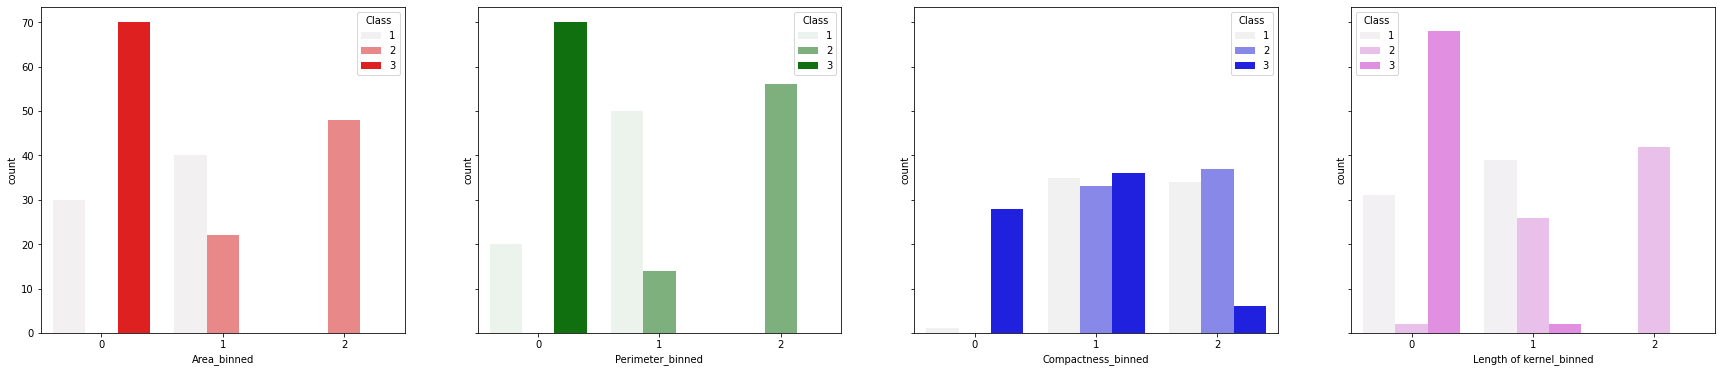

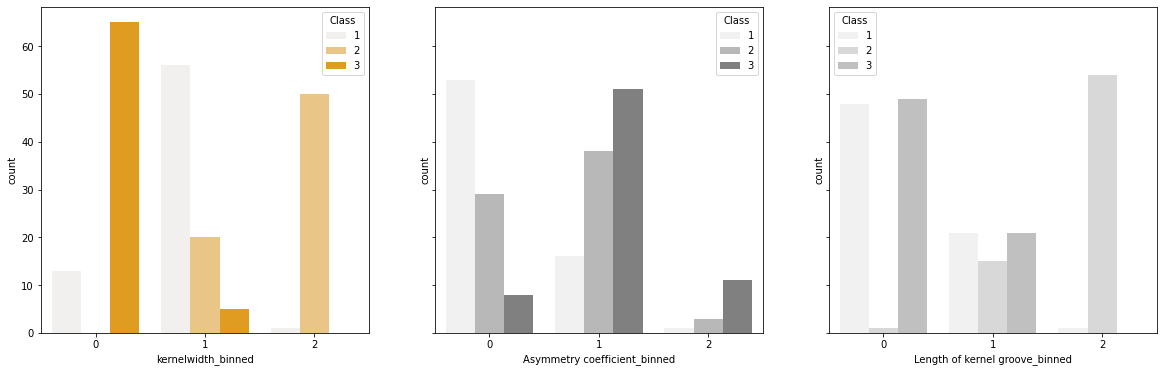

In [374]:
fig,axes = plt.subplots(1,4,figsize = (30,6),sharey = True)
sns.countplot(data=df,ax=axes[0],x="Area_binned",hue="Class",color='r')
sns.countplot(data=df,ax=axes[1],x="Perimeter_binned",hue="Class",color='g')
sns.countplot(data=df,ax=axes[2],x="Compactness_binned",hue="Class",color='b')
sns.countplot(data=df,ax=axes[3],x="Length of kernel_binned",hue="Class",color='violet')

fig,axes = plt.subplots(1,3,figsize = (20,6),sharey = True)
sns.countplot(data=df,ax=axes[0],x="kernelwidth_binned",hue="Class",color='orange')
sns.countplot(data=df,ax=axes[1],x="Asymmetry coefficient_binned",hue="Class",color='grey')
sns.countplot(data=df,ax=axes[2],x="Length of kernel groove_binned",hue="Class",color='silver')

#Part 6

In [375]:
total = []
for i in range(210):
  likelihood_class1[i] = likelihood_class1[i] * prob_class1
  likelihood_class2[i] = likelihood_class2[i] * prob_class2
  likelihood_class3[i] = likelihood_class3[i] * prob_class3
  total.append(likelihood_class1[i] + likelihood_class2[i] + likelihood_class3[i])

In [376]:
post1 = [0]*210
post2 = [0] *210
post3 = [0] * 210
for i in range(210):
  post1[i] = likelihood_class1[i] / total[i]
  post2[i] = likelihood_class2[i] / total[i]
  post3[i] = likelihood_class3[i] / total[i]

df['Post1'] = post1
df['Post2'] = post2
df['Post3'] = post3

df

,Class,Area_binned,Perimeter_binned,Compactness_binned,Length of kernel_binned,kernelwidth_binned,Asymmetry coefficient_binned,Length of kernel groove_binned,Likelihood_Y = 1,Likelihood_Y = 2,Likelihood_Y = 3,Post1,Post2,Post3
0,1,1,1,1,1,1,0,1,0.020661,0.000279,0.000000,0.986668,0.013332,0.000000
1,1,1,1,1,1,1,0,0,0.047226,0.000019,0.000000,0.999606,0.000394,0.000000
2,1,1,1,2,0,1,0,0,0.036466,0.000002,0.000000,0.999956,0.000044,0.000000
3,1,0,0,2,0,1,0,0,0.010940,0.000000,0.000476,0.958320,0.000000,0.041680
4,1,1,1,2,1,1,0,0,0.045877,0.000021,0.000000,0.999545,0.000455,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,3,0,0,1,0,0,1,0,0.000789,0.000000,0.236592,0.003325,0.000000,0.996675
206,3,0,0,1,0,0,1,0,0.000789,0.000000,0.236592,0.003325,0.000000,0.996675
207,3,0,0,2,0,1,2,0,0.000206,0.000000,0.000654,0.239836,0.000000,0.760164
208,3,0,0,1,0,0,1,0,0.000789,0.000000,0.236592,0.003325,0.000000,0.996675


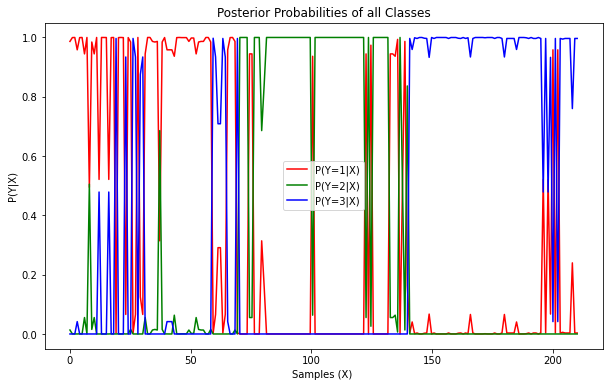

In [377]:
# Plotting the Posterior Probabilities of all three classes on the same grapgh

fig = plt.figure(figsize = (10,6))
x = np.linspace(0,210,210)
plt.plot(x,post1,c='r',label = 'P(Y=1|X)')
plt.plot(x,post2,c='g',label = 'P(Y=2|X)')
plt.plot(x,post3,c='b',label = 'P(Y=3|X)')
plt.title("Posterior Probabilities of all Classes")
plt.xlabel("Samples (X) ")
plt.ylabel("P(Y|X)")
plt.legend()
plt.show()